<a href="https://colab.research.google.com/github/cheddur93/DS-Sprint-02-Storytelling-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

# Storytelling with Data

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv')
df.rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'}, inplace=True)

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music' # note: changed to match 538
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Politician', 'Government', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, for each year of _The Daily Show_, calculate the percentage of guests from each occupation:
- Acting, Comedy, Music
- Government and Politics
- Media
- Other

#### Hints:
1. Use pandas to make a **crosstab** of **`Year`** & **`Occupation`**. ([This documentation](http://pandas.pydata.org/pandas-docs/stable/reshaping.html#cross-tabulations) has examples and explanation.)
2. To get percentages instead of counts, use crosstab's **`normalize`** parameter to normalize over each _row._ ([This documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html) describes the parameter and its options.)
3. You'll know you've calculated the crosstab correctly when the percentage of "Acting, Comedy, Music" guests is 90.36% in 1999, and 45% in 2015.

In [4]:
df.shape

(2693, 6)

In [5]:
df.isna().sum()

Year                          0
GoogleKnowlege_Occupation    26
Show                          0
Group                        31
Guest                         0
Occupation                    0
dtype: int64

In [6]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Year                         0
GoogleKnowlege_Occupation    0
Show                         0
Group                        0
Guest                        0
Occupation                   0
dtype: int64

In [9]:
df.shape

(2662, 6)

In [10]:
df.drop(columns=['GoogleKnowlege_Occupation','Group'],inplace=True)
df.head()

,Year,Show,Guest,Occupation
0,1999,1/11/99,Michael J. Fox,"Acting, Comedy & Music"
1,1999,1/12/99,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,1/13/99,Tracey Ullman,"Acting, Comedy & Music"
3,1999,1/14/99,Gillian Anderson,"Acting, Comedy & Music"
4,1999,1/18/99,David Alan Grier,"Acting, Comedy & Music"


In [11]:
ct = pd.crosstab(df['Year'],df['Occupation'],normalize='index')
ct

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.920245,0.012270,0.067485,0.000000
2000,0.757576,0.084848,0.127273,0.030303
2001,0.730769,0.038462,0.198718,0.032051
2002,0.630573,0.070064,0.267516,0.031847
2003,0.584906,0.106918,0.257862,0.050314
2004,0.391304,0.229814,0.279503,0.099379
2005,0.370370,0.160494,0.333333,0.135802
2006,0.362500,0.193750,0.293750,0.150000
2007,0.257143,0.171429,0.335714,0.235714


# Part 2 — Recreate this explanatory visualization:

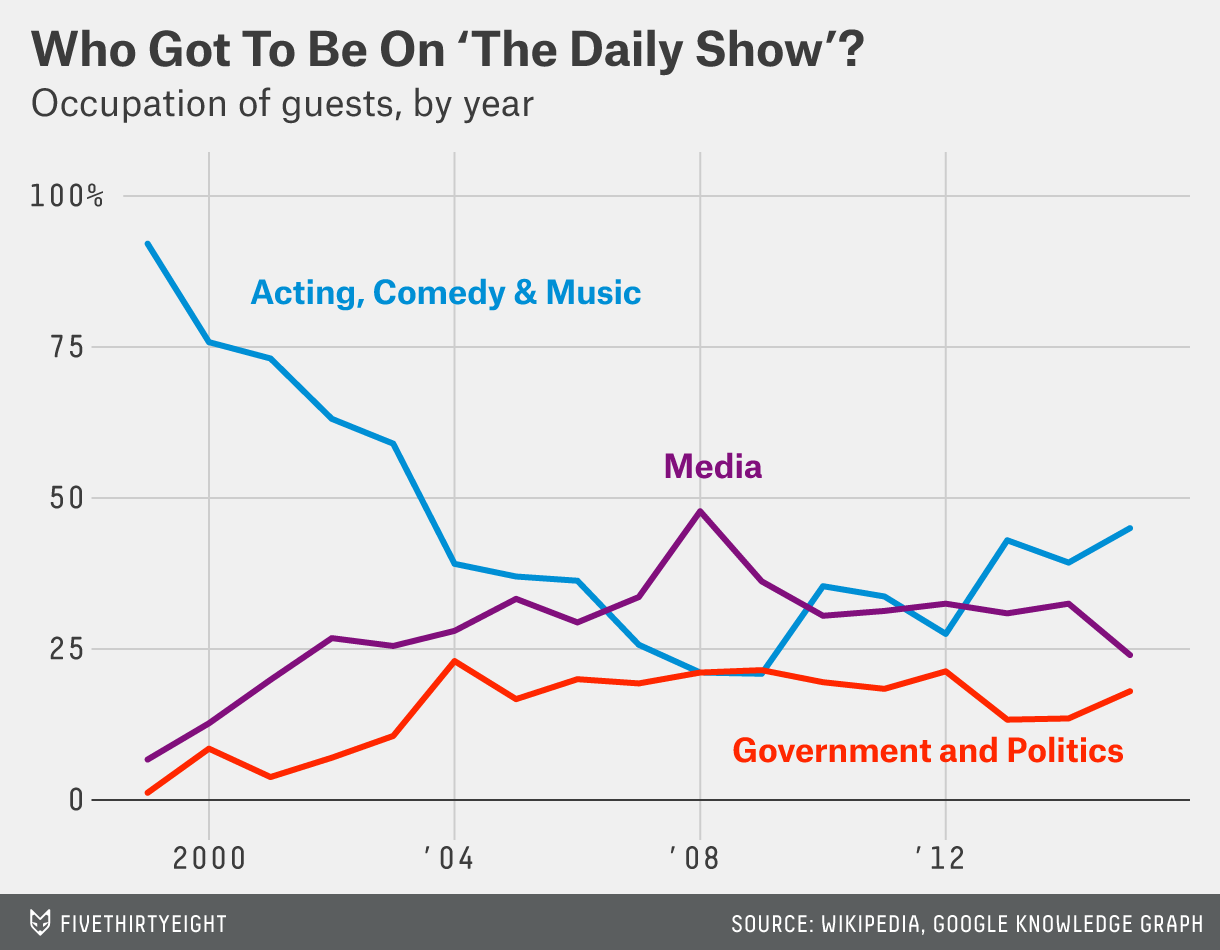

In [12]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)

**Hint:** use the crosstab you calculated in part 1!

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

Any visual element not specifically mentioned in the expectations is an optional bonus, but it's _not_ required to pass the Sprint Challenge.






In [13]:
graph = ct.drop(columns=['Other'])
graph

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,0.920245,0.012270,0.067485
2000,0.757576,0.084848,0.127273
2001,0.730769,0.038462,0.198718
2002,0.630573,0.070064,0.267516
2003,0.584906,0.106918,0.257862
2004,0.391304,0.229814,0.279503
2005,0.370370,0.160494,0.333333
2006,0.362500,0.193750,0.293750
2007,0.257143,0.171429,0.335714


In [0]:
# Would love to know how to more easily do this...

graph.loc[:,'Acting, Comedy & Music'] *= 100
graph.loc[:,'Government and Politics'] *= 100
graph.loc[:,'Media'] *= 100

In [15]:
graph

Occupation,"Acting, Comedy & Music",Government and Politics,Media
Year,,,
1999,92.024540,1.226994,6.748466
2000,75.757576,8.484848,12.727273
2001,73.076923,3.846154,19.871795
2002,63.057325,7.006369,26.751592
2003,58.490566,10.691824,25.786164
2004,39.130435,22.981366,27.950311
2005,37.037037,16.049383,33.333333
2006,36.250000,19.375000,29.375000
2007,25.714286,17.142857,33.571429


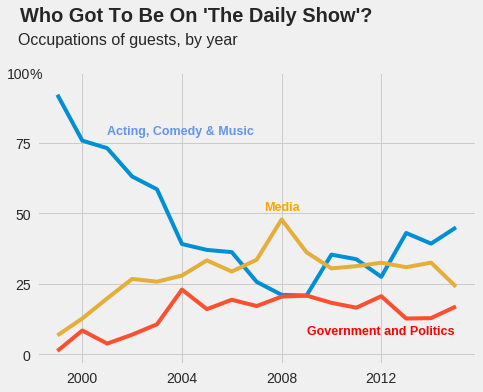

In [57]:
plt.style.use('fivethirtyeight')

ax = graph.plot.line(xticks=[2000,2004,2008,2012],
                     yticks=[0,25,50,75,100], fontsize=14,
                     figsize=(7,5),legend=False);

ax.text(x=1997.5, y=118, s="Who Got To Be On 'The Daily Show'?"
       ,fontsize=20, fontweight='bold')
ax.text(x=1997.4, y=110, s="Occupations of guests, by year"
       ,fontsize=16)
ax.text(x=1997.9, y=98.05025, s="%"
       ,fontsize=14)

ax.text(x=2001, y=78, s="Acting, Comedy & Music"
       ,fontsize=12.5, fontweight='bold',color='cornflowerblue')
ax.text(x=2007.3, y=51, s="Media"
       ,fontsize=12.5, fontweight='bold',color='orange')
ax.text(x=2009, y=7, s="Government and Politics"
       ,fontsize=12.5, fontweight='bold',color='r')

ax.set(xlabel="")

plt.show();

# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Hint:** you can use the pandas `value_counts` method.

**Expectations:** This can be a simple, quick plot: exploratory, not explanatory. If you want, you can add titles and change aesthetics, but it's _not_ required to pass the Sprint Challenge.

In [59]:
df

,Year,Show,Guest,Occupation
0,1999,1/11/99,Michael J. Fox,"Acting, Comedy & Music"
1,1999,1/12/99,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,1/13/99,Tracey Ullman,"Acting, Comedy & Music"
3,1999,1/14/99,Gillian Anderson,"Acting, Comedy & Music"
4,1999,1/18/99,David Alan Grier,"Acting, Comedy & Music"
5,1999,1/19/99,William Baldwin,"Acting, Comedy & Music"
6,1999,1/20/99,Michael Stipe,"Acting, Comedy & Music"
7,1999,1/21/99,Carmen Electra,Media
8,1999,1/25/99,Matthew Lillard,"Acting, Comedy & Music"
9,1999,1/26/99,David Cross,"Acting, Comedy & Music"


In [83]:
df.Guest.value_counts()
guests.head(10)

Fareed Zakaria    19
Denis Leary       17
Brian Williams    16
Paul Rudd         13
Ricky Gervais     13
Tom Brokaw        12
Reza Aslan        10
Bill O'Reilly     10
Will Ferrell      10
Richard Lewis     10
Name: Guest, dtype: int64

In [98]:
df2 = df[df.Guest.isin(['Fareed Zakaria','Denis Leary','Brian Williams','Paul Rudd','Ricky Gervais','Tom Brokaw','Reza Aslan',"Bill O'Reilly",'Will Ferrell','Richard Lewis'])]
df2

,Year,Show,Guest,Occupation
44,1999,12/6/99,Paul Rudd,"Acting, Comedy & Music"
150,1999,8/4/99,Denis Leary,"Acting, Comedy & Music"
163,1999,9/29/99,Richard Lewis,"Acting, Comedy & Music"
167,2000,1/11/00,Will Ferrell,"Acting, Comedy & Music"
341,2001,1/22/01,Bill O'Reilly,Media
348,2001,1/9/01,Richard Lewis,"Acting, Comedy & Music"
355,2001,10/18/01,Fareed Zakaria,Media
375,2001,11/5/01,Paul Rudd,"Acting, Comedy & Music"
406,2001,3/22/01,Denis Leary,"Acting, Comedy & Music"
408,2001,3/27/01,Richard Lewis,"Acting, Comedy & Music"


In [0]:
df2 = df2.drop_duplicates(keep='first',subset=['Guest'])

In [100]:
df2.head(10)

,Year,Show,Guest,Occupation
44,1999,12/6/99,Paul Rudd,"Acting, Comedy & Music"
150,1999,8/4/99,Denis Leary,"Acting, Comedy & Music"
163,1999,9/29/99,Richard Lewis,"Acting, Comedy & Music"
167,2000,1/11/00,Will Ferrell,"Acting, Comedy & Music"
341,2001,1/22/01,Bill O'Reilly,Media
355,2001,10/18/01,Fareed Zakaria,Media
533,2002,12/10/02,Tom Brokaw,Media
786,2003,7/29/03,Brian Williams,Media
1065,2005,4/21/05,Reza Aslan,Other
1134,2005,9/21/05,Ricky Gervais,"Acting, Comedy & Music"


In [105]:
Appearances = [13,17,10,10,10,19,12,16,10,13]
df2['Appearances'] = Appearances
df2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Year,Show,Guest,Occupation,Appearances
44,1999,12/6/99,Paul Rudd,"Acting, Comedy & Music",13
150,1999,8/4/99,Denis Leary,"Acting, Comedy & Music",17
163,1999,9/29/99,Richard Lewis,"Acting, Comedy & Music",10
167,2000,1/11/00,Will Ferrell,"Acting, Comedy & Music",10
341,2001,1/22/01,Bill O'Reilly,Media,10
355,2001,10/18/01,Fareed Zakaria,Media,19
533,2002,12/10/02,Tom Brokaw,Media,12
786,2003,7/29/03,Brian Williams,Media,16
1065,2005,4/21/05,Reza Aslan,Other,10
1134,2005,9/21/05,Ricky Gervais,"Acting, Comedy & Music",13


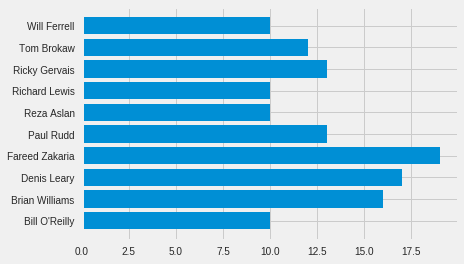

In [107]:
plt.barh(df2['Guest'],df2['Appearances']);